In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data

filename = 'Advertising.csv'
df_adv = pd.read_csv(filename)

In [3]:
# take a quick look of the dataset

df_adv.head(6)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


## Part 1: KNN by hand for $k=1$

In [4]:
# Get a subset of the data rows 6 to 13 and only TV advertisement. 
# The first row in the dataframe is the first row and not the zeroth row. 
data_x = df_adv.TV.iloc[5:13]
data_y = df_adv.Sales.iloc[5:13]

# Sort the data

idx = np.argsort(data_x).values # Get indices ordered from lowest to highest values

# Get the actual data in the order from above and turn them into numpy arrays. 

data_x  = data_x.iloc[idx].values
data_y  = data_y.iloc[idx].values

In [5]:
### edTest(test_findnearest) ###
# Define a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  Note that this 
# is just for k = 1 and the distance function is simply the 
# absolute value.

def find_nearest(array,value):
    
    idx = pd.Series(np.abs(array-value)).idxmin() # hint: to find idx, use .idxmin() function on the series
    return idx, array[idx]

In [6]:
# Create some artificial x-values (might not be in the actual dataset)

x = np.linspace(np.min(data_x), np.max(data_x))

# Initialize the y-values to zero

y = np.zeros( (len(x)))

In [7]:
# Apply the KNN algorithm.  Try to predict the y-value at a given x-value
# Note:  You may have tried to use the `range' method in your code.  Enumerate 
# is far better in this case.  

# Try to understand why.

for i, xi in enumerate(x):
    y[i] = data_y[find_nearest( data_x, xi )[0]]

### Plotting the data

Text(0, 0.5, 'Sales in $1000')

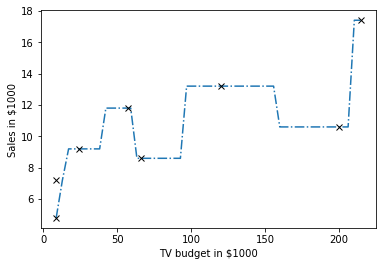

In [8]:
# Plot your solution    
plt.plot(x,y, '-.')
# Plot the original data using black x's.
plt.plot(data_x, data_y, 'kx')
plt.title('')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')


## Part 2: KNN for $k\ge1$ using sklearn

In [9]:
# import train_test_split and KNeighborsRegressor from sklearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [10]:
### Reading the complete Advertising dataset

# This time you are expected to read the entire dataset

data_filename = 'Advertising.csv'

# Read advertising.csv file using the pandas library (using pandas.read_csv)

df = pd.read_csv(data_filename)

# Choose sales as your response variable 'y' and 'TV' as your 'predictor variable'   

x = df[['TV']]
y = df['Sales']

In [11]:
### edTest(test_shape) ###

# Split the dataset in training and testing with 60% training set and 40% testing set 
# with random state = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6)

In [12]:
### edTest(test_nums) ###
# Choosing 
k_value_min = 1
k_value_max = 70

# creating list of integer k values betwwen k_value_min and k_value_max using linspace

k_list = np.linspace(k_value_min, k_value_max, 70)

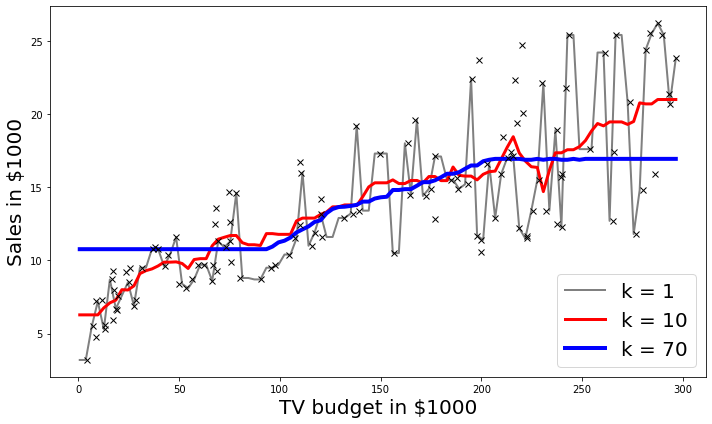

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
j=0
# Looping over k values
for k_value in k_list:   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # fitting model 
    model.fit(x_train,y_train)
    
    # test predictions  
    y_pred = model.predict(x_test)
    
    ## Plotting
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()

In the plotting code above, re-run `ax.plot(x_train, y_train,'x',label='test',color='k')` but this time with `x_test` and `y_test`. 

According to you work, which k value is the best. Why?

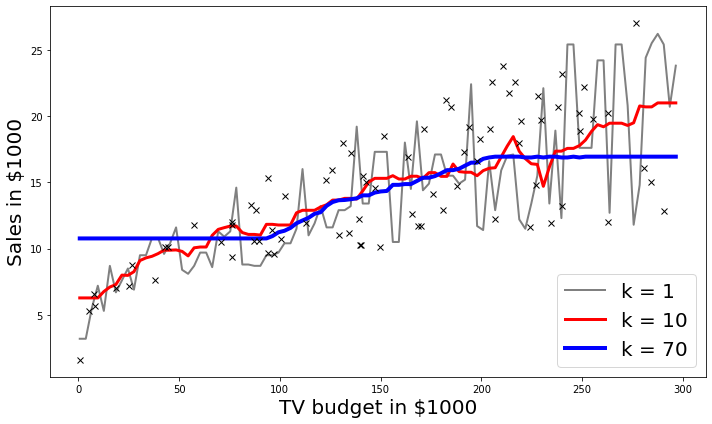

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
j=0
# Looping over k values
for k_value in k_list:   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # fitting model 
    model.fit(x_train,y_train)
    
    # test predictions  
    y_pred = model.predict(x_test)
    
    ## Plotting
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_test, y_test,'x',label='test',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()